## **Introduction**

This project aims to compare the performance of current (Max-bidding) and new campaign (Average-bidding) for an e-commerce website to make a decision about which campaign to use in the future based on A/B test results by EDA and hypothesis testing.

## **Importing Required Libraries**

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fligner
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

## **Exploring the Dataset**

The datasets named as Control campaing (Max-bidding) and Test campaign (Average-bidding) contains 30 rows and 10 attributes. Each row corresponds to A/B test results of the company for Control and Test campaigns on August 2019. The attributes are as follows:

**• Campaign Name:** Target campaign type for ad landing page.

**• Spend [USD]:** The amount of money spent on advertising in the campaign.

**• # of Impressions:** The number of people who viewed the ad in the campaign (contains repeated viewing of the same person for the ad).

**• Reach:** The number of unique people who saw the ad in the campaign.

**• # of Website Clicks:** The number of users who clicked on the website link in the campaign's advertisement.

**• # of Searches:** The number of users who performed a search on the website.

**• # of View Content:** Number of users who have viewed product details.

**• # of Add to Cart:** The number of users who have added the product to the cart.

**• # of Purchase:** The number of users who have purchased the product.

**• Date** 

In [183]:
#reading the "Control_Group" dataset
df_control=pd.read_csv("control_group.csv",sep = ";")

In [184]:
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
#reading the "Test_Group" dataset
df_test=pd.read_csv("test_group.csv",sep = ",")

In [186]:
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [187]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [188]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [189]:
df_control.shape

(30, 10)

In [190]:
df_test.shape

(30, 10)

## **Data Cleaning**

### **1) Missing Value Handling**

In [191]:
#checking how many missing values do we have in Control_Group dataset
df_control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

As it is seen, we have missing values in the columns other than "Campaign Name","Date" and "Spend".To handle this, missing values can be replaced with mean values of their own column. 

In [192]:
#replacing NaN values with mean values
df_control["# of Impressions"].fillna(value=df_control["# of Impressions"].mean(),inplace=True)   
df_control["Reach"].fillna(value=df_control["Reach"].mean(),inplace=True)    
df_control["# of Website Clicks"].fillna(value=df_control["# of Website Clicks"].mean(),inplace=True)       
df_control["# of Searches"].fillna(value=df_control["# of Searches"].mean(),inplace=True)       
df_control["# of View Content"].fillna(value=df_control["# of View Content"].mean(),inplace=True)       
df_control["# of Add to Cart"].fillna(value=df_control["# of Add to Cart"].mean(),inplace=True)       
df_control["# of Purchase"].fillna(value=df_control["# of Purchase"].mean(),inplace=True)    

In [193]:
df_control.isnull().values.sum()

0

In [194]:
df_test.isnull().values.sum()

0

Great! We're done with missing values

### **2) Dropping Duplicates**

In [196]:
#checking duplicated rows
df_control.duplicated(keep="first").value_counts()

False    30
dtype: int64

In [197]:
#checking duplicated rows
df_test.duplicated(keep="first").value_counts()

False    30
dtype: int64

We do not have any duplicated rows in both dataset. Let's move on.

### **3) Changing Data Types**

In [198]:
#converting "Date" column data type from object to datetime
df_control['Date'] = pd.to_datetime(df_control['Date'], format='%d.%m.%Y') 
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d.%m.%Y')

In [199]:
df_control[["# of Impressions","Reach","# of Website Clicks","# of Searches","# of View Content","# of Add to Cart","# of Purchase"]]= \
df_control[["# of Impressions","Reach","# of Website Clicks","# of Searches","# of View Content","# of Add to Cart","# of Purchase"]].astype("int64")

In [200]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [201]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


### **4) Renaming Columns**

In [205]:
df_control=df_control.rename(columns={"Campaign Name":"campaign_name","Date":"date","Spend [USD]":"spend_usd","# of Impressions":"impressions","Reach":"reach","# of Website Clicks":"website_clicks",\
                                      "# of Searches":"searches","# of View Content":"view_content","# of Add to Cart":"add_to_cart","# of Purchase":"purchase"}) 
df_test=df_test.rename(columns={"Campaign Name":"campaign_name","Date":"date","Spend [USD]":"spend_usd","# of Impressions":"impressions","Reach":"reach","# of Website Clicks":"website_clicks",\
                                      "# of Searches":"searches","# of View Content":"view_content","# of Add to Cart":"add_to_cart","# of Purchase":"purchase"}) 

In [206]:
df_control.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,2019-08-05,1835,109559,88844,5320,2221,1943,1300,522


In [207]:
df_test.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


### **5) Adding New Metrics CTR(%) and Conversion Rate(%) to the Datasets**

In [208]:
df_control['CTR(%)'] = round(df_control['website_clicks']*100/df_control['impressions'],2)
df_control['Conversion Rate(%)'] = round(df_control['purchase']*100/df_control['website_clicks'],2)
df_test['CTR(%)'] = round(df_test['website_clicks']*100/df_test['impressions'],2)
df_test['Conversion Rate(%)'] = round(df_test['purchase']*100/df_test['website_clicks'],2)

In [209]:
#combining two datasets to be ready for the analysis
df=df_control.merge(df_test,how="outer")

In [210]:
df.shape

(60, 12)

We're all set. Now, Let's jump into it !

## **Exploratory Data Analysis**

### **Descriptive Statistics**

In [212]:
df_control.describe()

,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,CTR(%),Conversion Rate(%)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109559.733333,88844.900000,5320.766667,2221.300000,1943.766667,1300.000000,522.766667,5.087667,11.422000
std,367.334451,21311.695473,21452.627593,1726.803738,851.025797,764.021921,400.371207,181.810565,2.014521,6.726445
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000,1.860000,3.350000
25%,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000,3.637500,6.315000
50%,2299.500000,112368.000000,91418.000000,5272.000000,2340.000000,1979.500000,1319.500000,506.000000,4.790000,10.020000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000,6.697500,14.365000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000,8.830000,32.240000


In [213]:
df_test.describe()

,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,CTR(%),Conversion Rate(%)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333,10.241667,9.230667
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745,6.771612,4.449266
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000,2.980000,3.010000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000,5.310000,6.570000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000,8.035000,8.450000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000,12.847500,11.667500
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000,33.820000,21.090000


Text(0.5, 0.98, 'Box Plots of Each Attribute per Campaign')

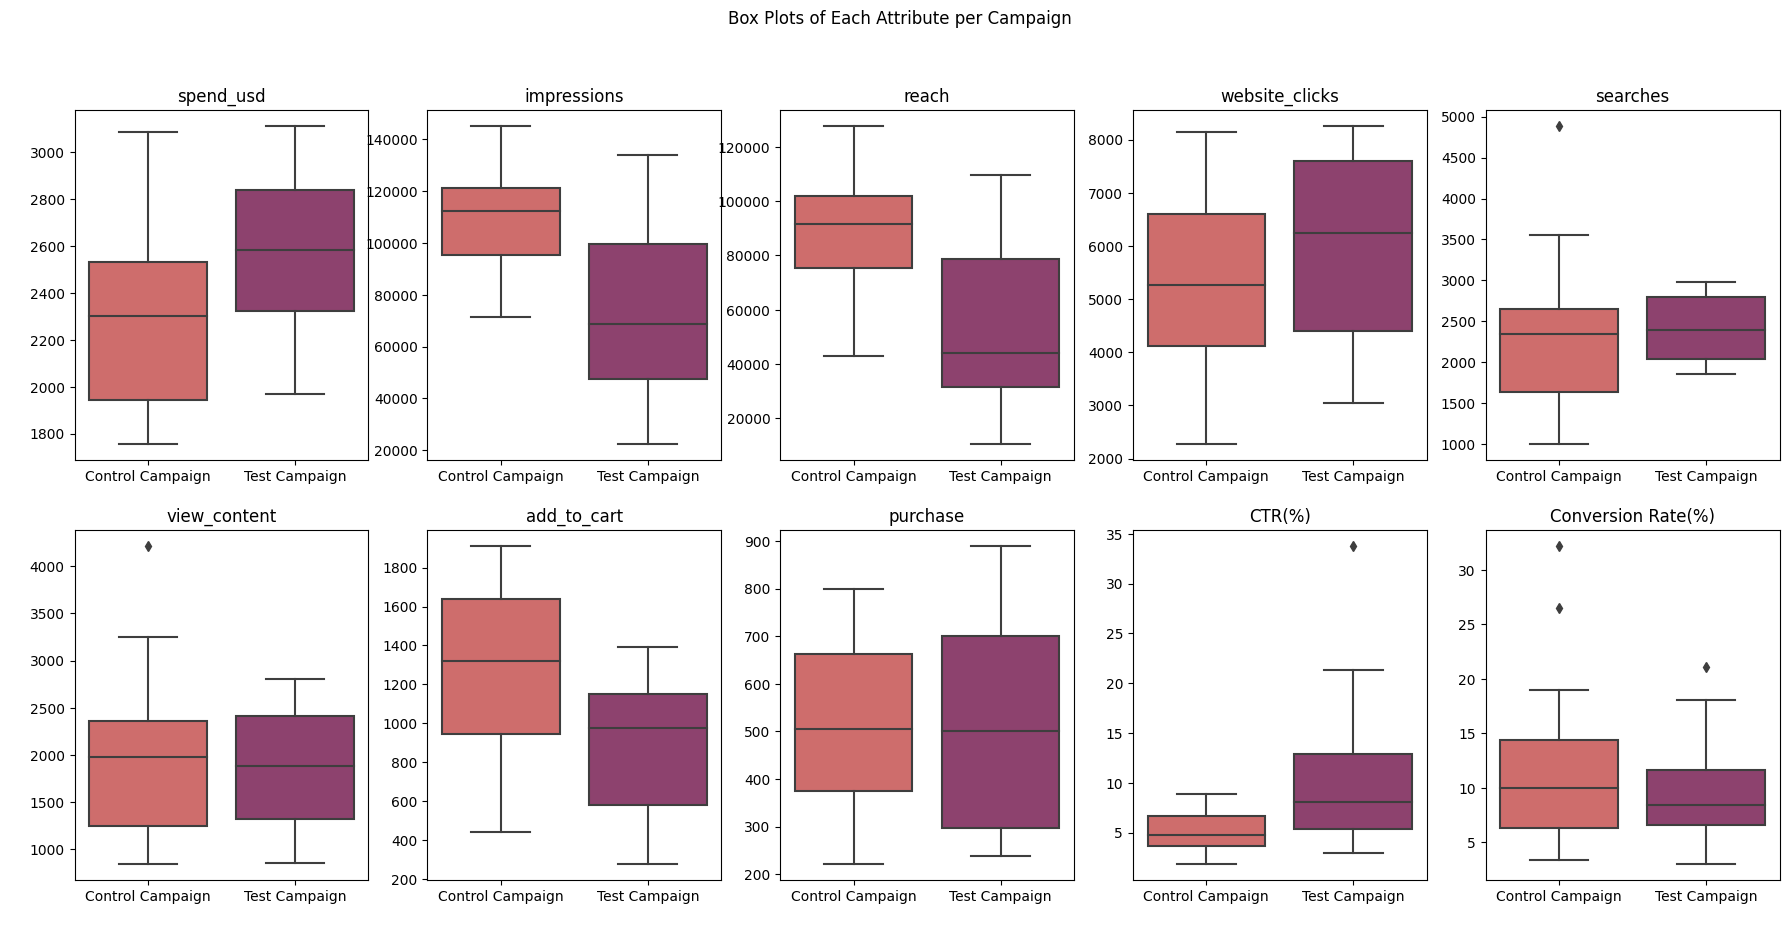

In [232]:
#creating box plots for each attribute
fig, ax = plt.subplots(2,5, figsize=(22,10))
sns.boxplot(data=df, y='spend_usd', x="campaign_name", ax=ax[0,0],palette="flare")
sns.boxplot(data=df, y="impressions", x="campaign_name", ax=ax[0,1],palette="flare")
sns.boxplot(data=df, y="reach", x="campaign_name", ax=ax[0,2],palette="flare")
sns.boxplot(data=df, y="website_clicks", x="campaign_name", ax=ax[0,3],palette="flare")
sns.boxplot(data=df, y="searches", x="campaign_name", ax=ax[0,4],palette="flare")
sns.boxplot(data=df, y="view_content", x="campaign_name", ax=ax[1,0],palette="flare")
sns.boxplot(data=df, y="add_to_cart", x="campaign_name", ax=ax[1,1],palette="flare")
sns.boxplot(data=df, y="purchase", x="campaign_name", ax=ax[1,2],palette="flare")
sns.boxplot(data=df, y="CTR(%)", x="campaign_name", ax=ax[1,3],palette="flare")
sns.boxplot(data=df, y="Conversion Rate(%)", x="campaign_name", ax=ax[1,4],palette="flare")

cols=df.columns[2:12]
i=0
j=0

for col in cols:
    ax[i,j].set_xlabel(" ")
    ax[i,j].set_ylabel(" ")
    ax[i,j].set_title(col)
    
    if j>=4:
        i=i+1
        j=j-5
    j+=1
fig.suptitle("Box Plots of Each Attribute per Campaign")

• We have a small number of outliers in "searches", "view_content", "CTR(%)" and "Conversion Rate(%)". Due to the small size of dataset and legitimate observations, it is better to keep outliers to prevent losing valuable information and changing the analysis results. On the other hand, keeping outliers in datasets may cause to violate the assumptions of statistical tests. To handle this, non-parametric hypothesis tests which are robust to outliers can be used in further analysis.<br>

• The median values of attributes are different for each campaign other than searches,view_content, and purchases.<br>

• Impressions, reach and CTR(%) in test campaign show wider distribution meaning of more variability in the results in terms of IQR compared to control campaign. On the other hand, Conversion Rate(%) has a very similar IQR. It is also worth noting that while purchase in both campaigns has almost the same median, the box plot in test campaign ends up with a higher variation.<br>

• Spend in control campaign is positively skewed and the median is closer to the bottom of the box with smaller values when compared to the box plot in test campaign. CTR(%) in test campaign is skewed to the right as well. In addition, Conversion Rate(%) in control campaign is also skewed to the right under the effect of outliers.On the other hand, add_to_car in control campaign is negatively skewed and the median is closer to the top of the box with higher values when compared to the box plot in test campaign.<br>

• Impressions,reach,searches,view_content,add to cart have higher max values in control campaign. On the other side,purchase and CTR(%) have the higher max values in test campaign.

Now, let's take a look at the comparison of each attributes per campaign in terms of total number of records as well.

### **What is the total number of records for each attribute per campaign ?**

In [220]:
#grouping by campaign name to get the sum of records for each attributes
df1=df.groupby(by=["campaign_name"]) 
df2=df1.agg({"spend_usd":["sum"],
         "impressions":["sum"],
         "reach":["sum"],
         "website_clicks":["sum"],
         "searches":["sum"],
         "view_content":["sum"],
         "add_to_cart":["sum"],
         "purchase":["sum"] })
df2.columns = df2.columns.droplevel(1)        
df2.reset_index()

,campaign_name,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,68653,3286792,2665347,159623,66639,58313,39000,15683
1,Test Campaign,76892,2237544,1604747,180970,72569,55740,26446,15637


Text(0.5, 0.98, 'Comparison of Total Numbers of Each Attribute per Campaign')

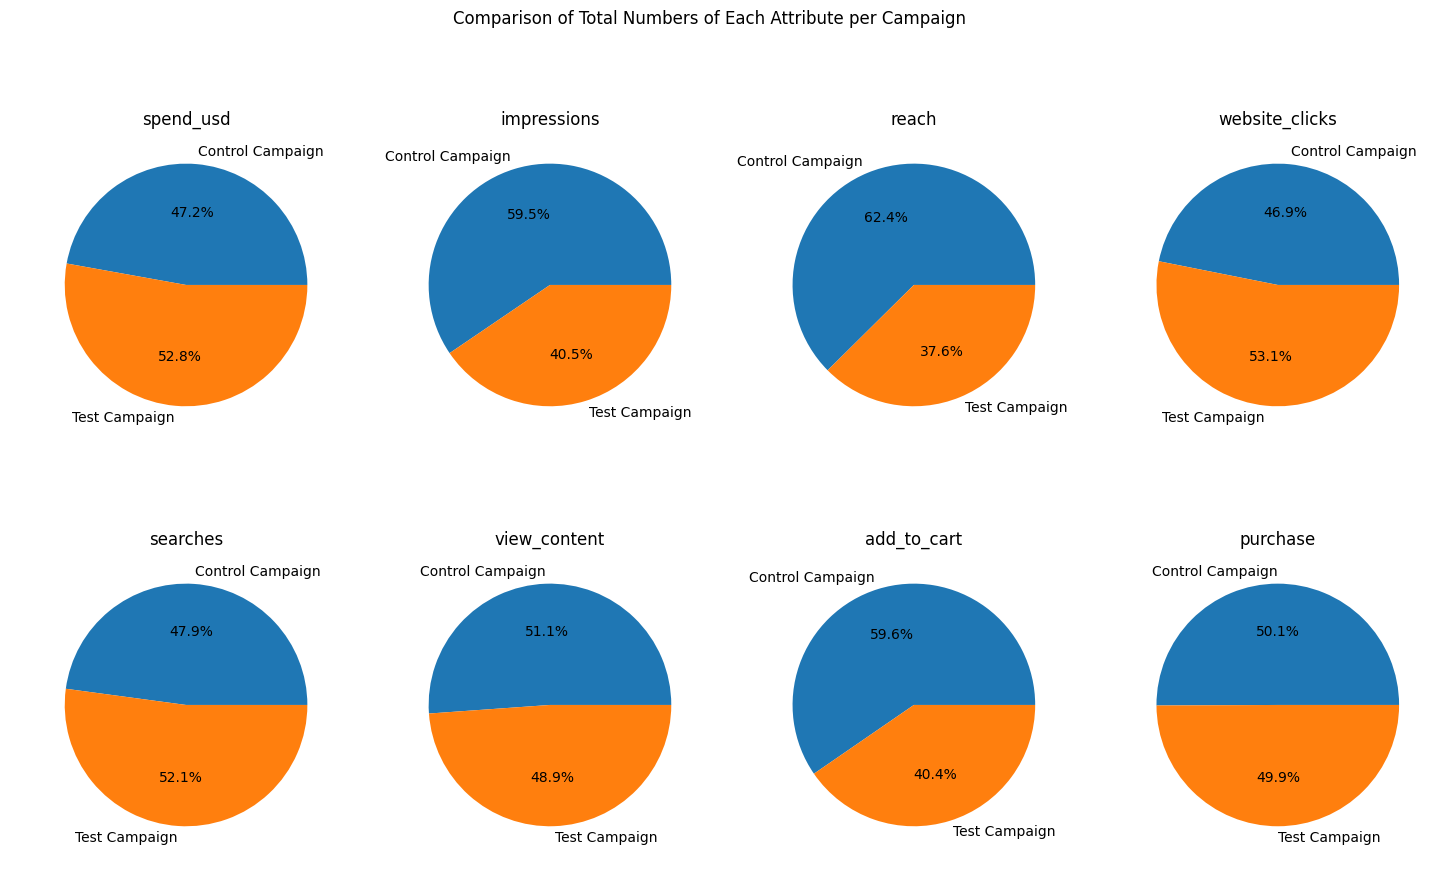

In [224]:
#creating pie charts of each attribute
fig, ax = plt.subplots(2,4, figsize=(18,10))
df2.plot(kind="pie",y="spend_usd", ax=ax[0,0],autopct="%1.1f%%")
df2.plot(kind="pie",y="impressions", ax=ax[0,1],autopct="%1.1f%%")
df2.plot(kind="pie",y="reach", ax=ax[0,2],autopct="%1.1f%%")
df2.plot(kind="pie",y="website_clicks", ax=ax[0,3],autopct="%1.1f%%")
df2.plot(kind="pie",y="searches", ax=ax[1,0],autopct="%1.1f%%")
df2.plot(kind="pie",y="view_content", ax=ax[1,1],autopct="%1.1f%%")
df2.plot(kind="pie",y="add_to_cart", ax=ax[1,2],autopct="%1.1f%%")
df2.plot(kind="pie",y="purchase", ax=ax[1,3],autopct="%1.1f%%")

cols=df.columns[2:10]
i=0
j=0

for col in cols:
    ax[i,j].set_xlabel(" ")
    ax[i,j].set_ylabel(" ")
    ax[i,j].set_title(col)
    ax[i,j].get_legend().remove()
    
    if j>=3:
        i=i+1
        j=j-4
    j+=1
fig.suptitle("Comparison of Total Numbers of Each Attribute per Campaign")

It is better to look at all pie charts to get an idea of which campaign has higher percentages. As a result, Control campaign ends up with higher results in impressions, reach,view_content, and add_to_cart in terms of the total number of records for each attribute. On the other hand, Test campaign has higher percentages in spend_usd,website_clicks, and searches. Suprisingly, the percentages of purchase are almost equal to each other.

## **What is the relationship between attributes ?**

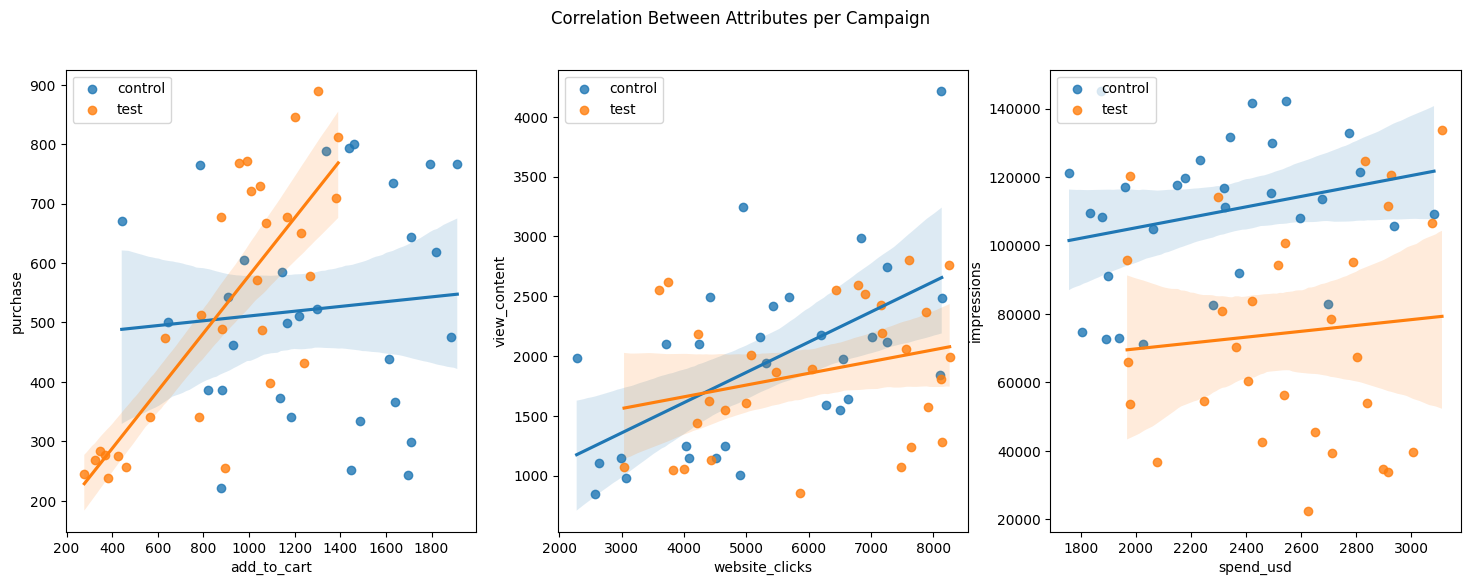

In [223]:
#creating scatter plots
fig, ax = plt.subplots(1,3, figsize=(18,6))

sns.regplot(data=df_control,x="add_to_cart",y="purchase",ax=ax[0],label="control")
sns.regplot(data=df_test,x="add_to_cart",y="purchase",ax=ax[0],label="test")
ax[0].legend(loc="upper left")

sns.regplot(data=df_control,x="website_clicks",y="view_content",ax=ax[1],label="control")
sns.regplot(data=df_test,x="website_clicks",y="view_content",ax=ax[1],label="test")
ax[1].legend(loc="upper left")

sns.regplot(data=df_control,x="spend_usd",y="impressions",ax=ax[2],label="control")
sns.regplot(data=df_test,x="spend_usd",y="impressions",ax=ax[2],label="test")
ax[2].legend(loc="upper left")

fig.suptitle("Correlation Between Attributes per Campaign")
plt.show()

Both campaigns have a positive linear relationship between purchase vs add_to_cart, view_content vs website_clicks, and impressions vs spend_usd. Test campaign in purchase vs add_to_cart and Control campaign in view_content vs website_clicks have steeper slopes meaning that they have a higher rate of change resulting in more sales and views. When it comes to impressions vs spend_usd, it can be clearly seen that Control campaign has a positive linear relationship with higher impression values.

### **What is the comparison of CTR(%) and Conversion Rate(%) per campaign ?**

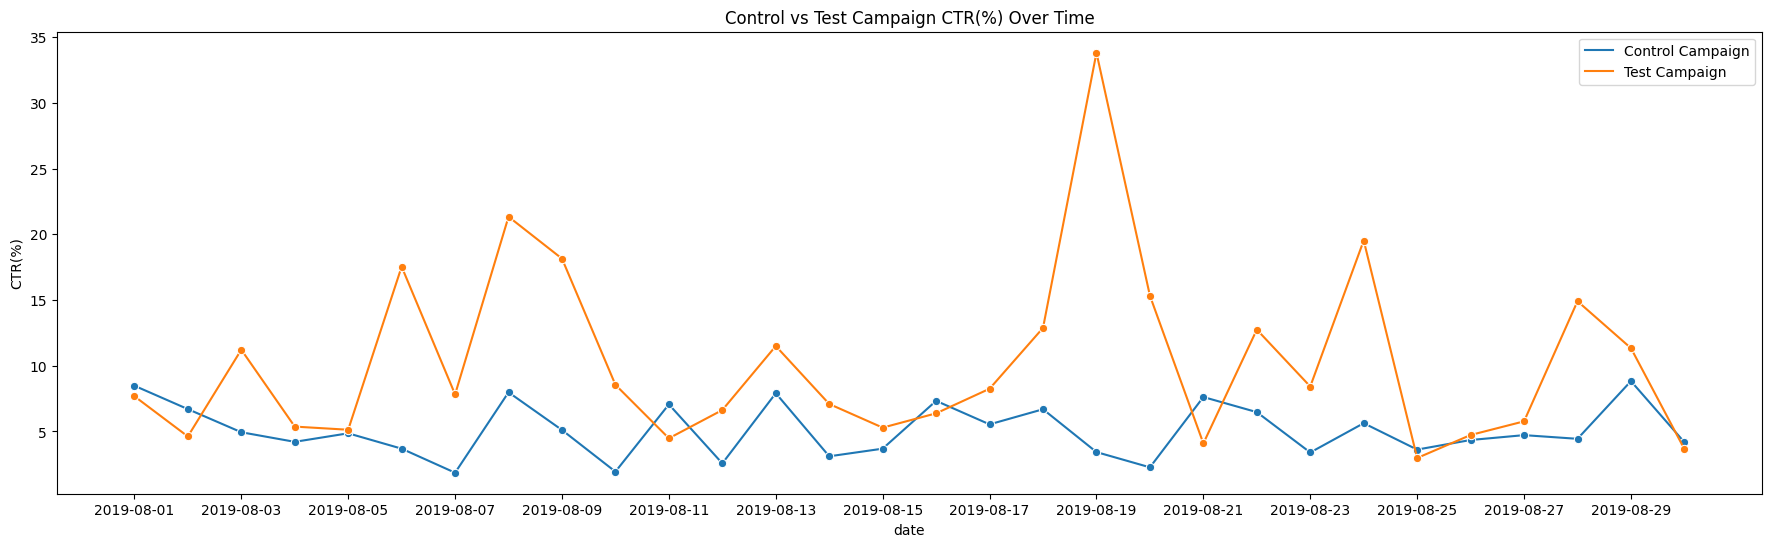

In [99]:
#creating time-series plot for CTR(%) 
date_range = pd.date_range("2019-08-01", "2019-08-30", freq="2D")
plt.figure(figsize=(22,6))
sns.lineplot(x="date", y="CTR(%)", data=df, hue="campaign_name",marker="o")
plt.xticks(date_range, date_range.strftime("%Y-%m-%d"))
plt.title("Control vs Test Campaign CTR(%) Over Time")
plt.legend(title="")
plt.show()

The peak value in test campaign is observed on 19.08.2019. It is associated with the outlier. However, for now, from the perspective of statistical tests, it is a better approach to keep it as it is. Overall, Test campaign has higher CTR(%) than control campaign.

Text(0.5, 1.0, 'CTR(%) per Campaign')

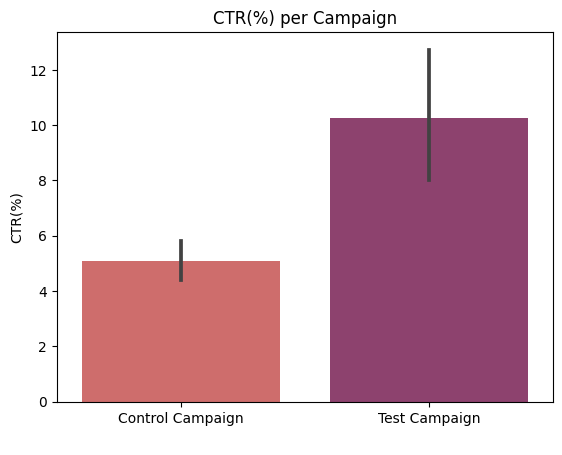

In [ ]:
#creating bar chart for CTR(%) per campaign
sns.barplot(data=df,x="campaign_name",y="CTR(%)",palette="flare")
plt.xlabel(" ") 
plt.title("CTR(%) per Campaign")

Test campaign has better results in CTR(%) with higher variation by analyzing the means of each campaign.

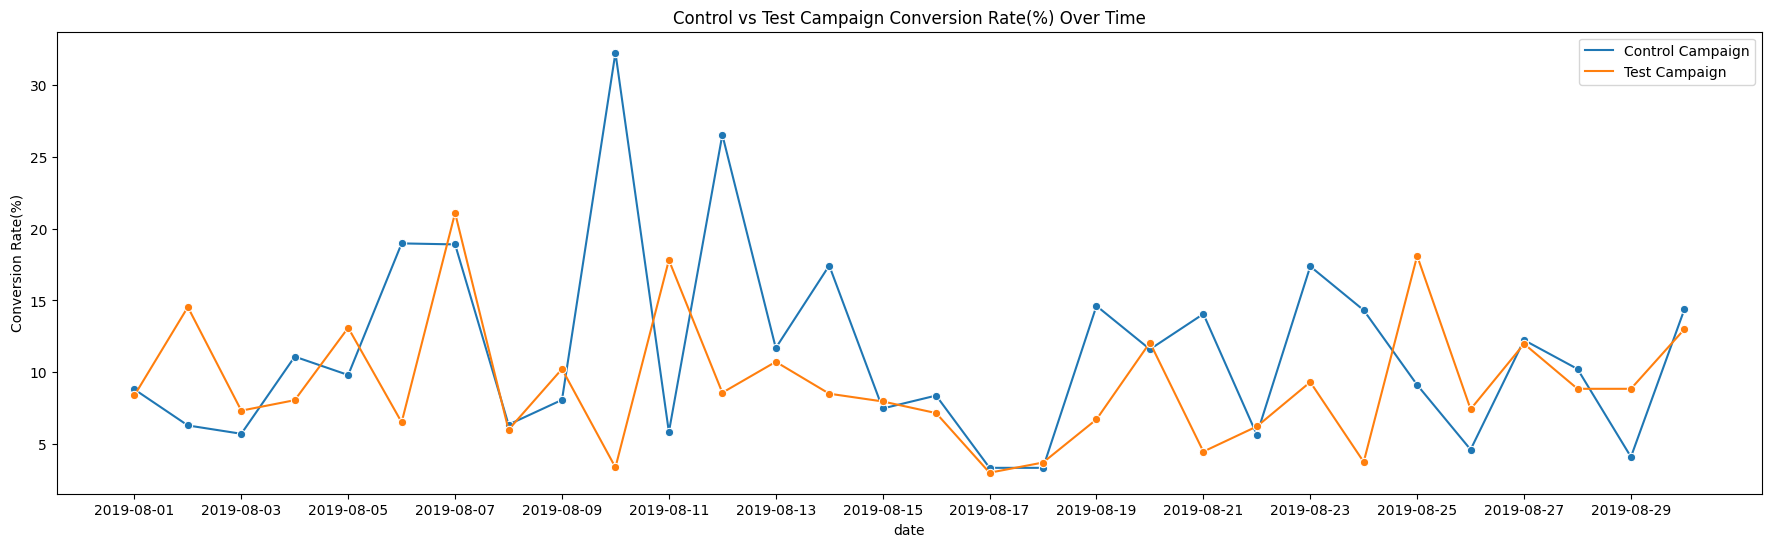

In [98]:
#creating time-series plot for Conversion Rate(%) 
date_range = pd.date_range("2019-08-01", "2019-08-30", freq="2D")
plt.figure(figsize=(22,6))
sns.lineplot(x="date", y="Conversion Rate(%)", data=df, hue="campaign_name",marker="o")
plt.xticks(date_range, date_range.strftime("%Y-%m-%d"))
plt.title("Control vs Test Campaign Conversion Rate(%) Over Time")
plt.legend(title="")
plt.show()

It turns out that Control campaign has two peaks on 10.08.2019 and 12.08.2019. it can be explained by the outliers like CTR(%). Nevertheless, in the sense of assumptions of further statistical tests, it is better to keep it as it is.

Text(0.5, 1.0, 'Conversion Rate(%) per Campaign')

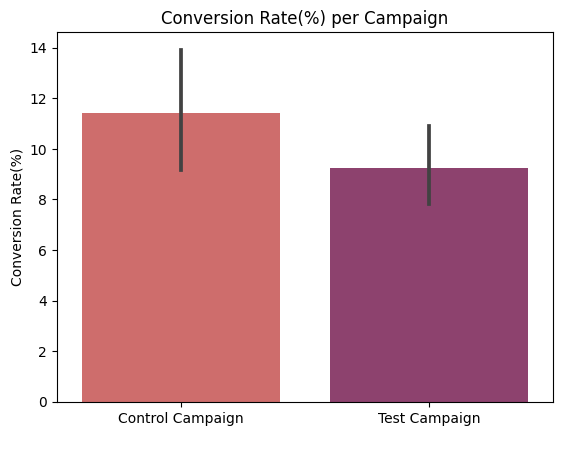

In [110]:
#creating bar chart for Conversion Rate(%) per campaign
sns.barplot(data=df,x="campaign_name",y="Conversion Rate(%)",palette="flare")
plt.xlabel(" ") 
plt.title("Conversion Rate(%) per Campaign")

Control campaign has better results in Conversion Rate(%) with higher variation by analyzing the means of each campaign.

Now, to gain a more comprehensive understanding of our campaign's performance, we will perform A/B testing on the CTR(%) and Conversion Rate(%).

## **A/B Testing**

### **1) A/B Testing on CTR(%)**

#### **Shapiro-Wilk Test**

Let's start off with checking the normality of campaigns in CTR(%).

**Null Hypothesis : (_Ho_) :** The data are normally distributed.<br>
**Alternative Hypothesis : (_H1_) :** The data are not normally distributed.

In [234]:
control_group=df_control["CTR(%)"]
test_group=df_test["CTR(%)"]

In [235]:
# performing shapiro test for CTR(%) in control group
W_statistic,p_value=shapiro(control_group)

# Print results
print("W-statistic:", W_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis ")

W-statistic: 0.9583185315132141
p-value: 0.280407190322876
Fail to reject null hypothesis


It is concluded that we fail to reject the null hypothesis with the p-value which is 0.28 and higher than the threshold (0.05). We do not have sufficient evidence to say that CTR(%) in control campaign is not normally distributed at the 0.05 α level.

In [236]:
# performing shapiro test for CTR(%) in test group
W_statistic,p_value=shapiro(test_group)

# Print results
print("W-statistic:", W_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis ")

W-statistic: 0.8409577012062073
p-value: 0.0004032782162539661
Reject null hypothesis 


It is concluded that we reject null hypothesis with the p-value which is 0.0004 and less than threshold (0.05). We have sufficient evidence to say that CTR(%) in test campaign is not normally distributed at the 0.05 α level.

Let's continue with Fligner-Killeen Test which checks the homogeneity of group variances in CTR(%).

#### **Fligner-Killeen Test**

**Null Hypothesis : (_Ho_) :** The variances of two groups are equal.<br>
**Alternative Hypothesis : (_H1_) :** The variances of two groups are not equal.

In [237]:
#perform fligner-killeen test
FK_statistic,p_value=fligner(control_group, test_group)

# Print results
print("FK-statistic:", FK_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis ")

FK-statistic: 13.280570380478455
p-value: 0.00026817089637856103
Reject null hypothesis 


It is concluded that we reject null hypothesis with the p-value which is 0.0003 and less than threshold (0.05). We have sufficient evidence to say that the CTR(%) variances of groups are not equal at the 0.05 α level.

As a result, Shapiro-Wilk and Fligner-Killeen Test have ended up with non-normally distributed and non-homogeneity of variance for the campaigns. In that sense, from the perspective of assumptions of statistical test, Mann-Whitney U test is selected to detect whether there is a statistically significant difference between campaigns or not.

#### **Mann-Whitney U test**

**Null Hypothesis : (_Ho_) :** The medians of the two groups are equal.<br>
**Alternative Hypothesis : (_H1_) :** The medians of the two groups are not equal.

In [239]:
#perform mann-whitney u test
U_statistic,p_value=mannwhitneyu(control_group, test_group,alternative="two-sided")

# Print results
print("U-statistic:", U_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis ")

U-statistic: 199.0
p-value: 0.00021260323701001942
Reject null hypothesis 


It is concluded that we reject null hypothesis with the p-value which is 0.0002 and less than threshold (0.05). We have sufficient evidence to say that the CTR(%) medians of groups are not equal at the 0.05 α level.

### **2) A/B Testing on Conversion Rate(%)**

#### **Shapiro-Wilk Test**

Let's start off with checking the normality of campaigns in Conversion Rate(%).

**Null Hypothesis : (_Ho_) :** The data are normally distributed.<br>
**Alternative Hypothesis : (_H1_) :** The data are not normally distributed.

In [242]:
control_group=df_control["Conversion Rate(%)"]
test_group=df_test["Conversion Rate(%)"]

In [243]:
# performing shapiro test for Conversion Rate(%) in control group
W_statistic,p_value=shapiro(control_group)

# Print results
print("W-statistic:", W_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis ")

W-statistic: 0.8928880095481873
p-value: 0.005651690997183323
Reject null hypothesis 


It is concluded that we reject null hypothesis with the p-value which is 0.0056 and less than threshold (0.05). We have sufficient evidence to say that Conversion Rate(%) in control group is not normally distributed at the 0.05 α level.

In [244]:
# performing shapiro test for Conversion Rate(%) in test group
W_statistic,p_value=shapiro(test_group)

# Print results
print("W-statistic:", W_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis ")

W-statistic: 0.9254654049873352
p-value: 0.0372605063021183
Reject null hypothesis 


It is concluded that we reject null hypothesis with the p-value which is 0.037 and less than threshold (0.05). We have sufficient evidence to say that Conversion Rate(%) in test campaign is not normally distributed at the 0.05 α level.

Let's continue with Fligner-Killeen Test which checks the homogeneity of group variances in Conversion Rate(%). 

#### **Fligner-Killeen Test**

**Null Hypothesis : (_Ho_) :** The variances of two groups are equal.<br>
**Alternative Hypothesis : (_H1_) :** The variances of two groups are not equal.

In [245]:
#perform fligner-killeen test
FK_statistic,p_value=fligner(control_group, test_group)

# Print results
print("FK-statistic:", FK_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis ")

FK-statistic: 2.4409346261957117
p-value: 0.11820577734625844
Fail to reject null hypothesis


It is concluded that we fail to reject the null hypothesis with the p-value which is 0.12 and higher than the threshold (0.05). We do not have sufficient evidence to say that Conversion Rate(%) variances of groups are not equal at the 0.05 α level.

As a result, Shapiro-Wilk and Fligner-Killeen Test have ended up with non-normally distributed and equal variances for the campaigns. In that sense, from the perspective of assumptions of statistical test, Mann-Whitney U test is selected to detect whether there is a statistically significant difference between campaigns or not.

#### **Mann-Whitney U test**

**Null Hypothesis : (_Ho_) :** The medians of the two groups are equal.<br>
**Alternative Hypothesis : (_H1_) :** The medians of the two groups are not equal.

In [246]:
#perform mann-whitney u test
U_statistic,p_value=mannwhitneyu(control_group, test_group,alternative="two-sided")

# Print results
print("U-statistic:", U_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis ")

U-statistic: 523.5
p-value: 0.2804504298618341
Fail to reject null hypothesis


It is concluded that we reject null hypothesis with the p-value which is 0.28 and less than threshold (0.05). We do not have sufficient evidence to say that the Conversion Rate(%) medians of groups are not equal at the 0.05 α level.

## **Conclusion**

• Test campaign, which is Average-bidding strategy, has a higher CTR(%) of %10.24 than Control campaign (%5.08), which is Max-bidding, which in turn found that the result is statistically significant.<br>

• Control campaign has a higher Conversion Rate(%) of %11.4 than Test campaign (%9.2). However, there is no sufficient evidence that the result is statistically significant.<br>

• Both campaigns have almost the same amount of purchases, Although Test campaign has a higher amount of money spent than Control campaign.<br>

• Control campaign, which is Max-bidding, has higher impressions and reach values with regard to the aim of Max-bidding strategy.<br>

• Overall, even if Test campaign has a higher CTR(%), it has a lower Conversion Rate (%) in terms of the mean value of performance metrics. It can be explained by marketing strategies and statistical requirements:<br>
>-The ad in campaign is targeting the wrong consumers.<br>
>-Working with a small size of data and having outliers affects the distribution, variability, and skewness with the selection of statistical methods resulting in a non-parametric test.<br>

• It is recommended to conduct A/B test with a larger amount of data focused on targeted people for a longer period of time to observe trends, patterns, and variations. This will allow us to use of the right statistical methods to determine which campaign is more effective in a statistical manner.<br>
